In [6]:
import pandas as pd

In [7]:
import numpy as np

In [8]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

In [10]:
data=pd.read_csv("data.csv")
data.head(-4)


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,569,2016,Raipur,2016-05-20,Sunrisers Hyderabad,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,6,KK Nair,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
569,570,2016,Visakhapatnam,2016-05-21,Kings XI Punjab,Rising Pune Supergiants,Kings XI Punjab,bat,normal,0,Rising Pune Supergiants,0,4,MS Dhoni,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,HDPK Dharmasena,Nitin Menon,NaN
570,571,2016,Kanpur,2016-05-21,Mumbai Indians,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,6,SK Raina,Green Park,AK Chaudhary,CK Nandan,NaN
571,572,2016,Kolkata,2016-05-22,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,22,0,YK Pathan,Eden Gardens,KN Ananthapadmanabhan,M Erasmus,NaN


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               577 non-null    int64  
 1   season           577 non-null    int64  
 2   city             570 non-null    object 
 3   date             577 non-null    object 
 4   team1            577 non-null    object 
 5   team2            577 non-null    object 
 6   toss_winner      577 non-null    object 
 7   toss_decision    577 non-null    object 
 8   result           577 non-null    object 
 9   dl_applied       577 non-null    int64  
 10  winner           574 non-null    object 
 11  win_by_runs      577 non-null    int64  
 12  win_by_wickets   577 non-null    int64  
 13  player_of_match  574 non-null    object 
 14  venue            577 non-null    object 
 15  umpire1          577 non-null    object 
 16  umpire2          577 non-null    object 
 17  umpire3         

In [12]:
data.drop(['umpire3'],axis=1,inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               577 non-null    int64 
 1   season           577 non-null    int64 
 2   city             570 non-null    object
 3   date             577 non-null    object
 4   team1            577 non-null    object
 5   team2            577 non-null    object
 6   toss_winner      577 non-null    object
 7   toss_decision    577 non-null    object
 8   result           577 non-null    object
 9   dl_applied       577 non-null    int64 
 10  winner           574 non-null    object
 11  win_by_runs      577 non-null    int64 
 12  win_by_wickets   577 non-null    int64 
 13  player_of_match  574 non-null    object
 14  venue            577 non-null    object
 15  umpire1          577 non-null    object
 16  umpire2          577 non-null    object
dtypes: int64(5), object(12)
memory usag

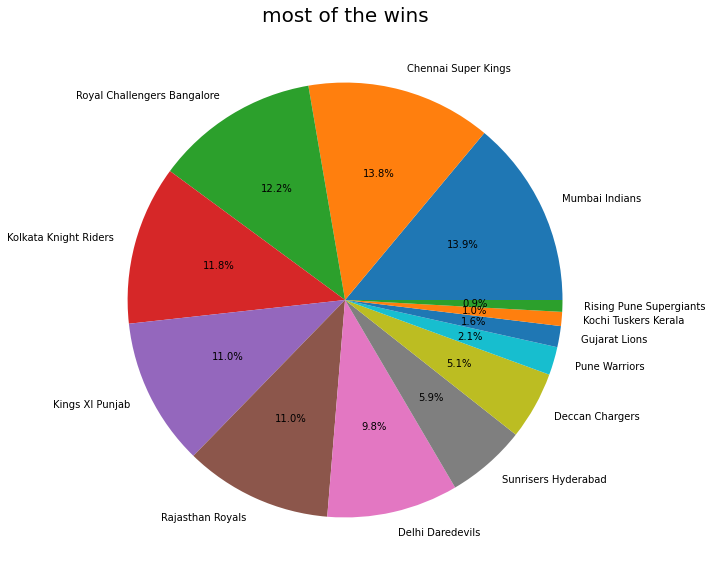

In [14]:
win=pd.DataFrame({"winner":data['winner']})
count_wins=win.value_counts()
#print(count_wins)
labels=[ X[0] for X in count_wins.keys() ]
bar,ax=plt.subplots(figsize=(15,10))
ax=plt.pie(x=count_wins,autopct="%.1f%%",labels=labels)
plt.title("most of the wins",fontsize=20)
plt.show()

In [15]:
teams =data['toss_winner'].unique()
decision_making=pd.DataFrame([],columns=['toss winner','decision','times'])
for id,element in enumerate(teams):
    temp_bat=data[(data['toss_winner']==element)&(data['toss_decision']=='bat')]
    temp_field=data[(data['toss_winner']==element)&(data['toss_decision']=='field')]
    decision_making=decision_making.append({'toss winner':element,'decision':'bat','times':temp_bat['toss_winner'].count()},ignore_index=True)
    decision_making=decision_making.append({'toss winner':element,'decision':'field','times':temp_field['toss_winner'].count()},ignore_index=True)

In [16]:
decision_making

,toss winner,decision,times
0,Royal Challengers Bangalore,bat,16
1,Royal Challengers Bangalore,field,45
2,Chennai Super Kings,bat,44
3,Chennai Super Kings,field,22
4,Rajasthan Royals,bat,28
5,Rajasthan Royals,field,35
6,Mumbai Indians,bat,38
7,Mumbai Indians,field,36
8,Deccan Chargers,bat,24
9,Deccan Chargers,field,19


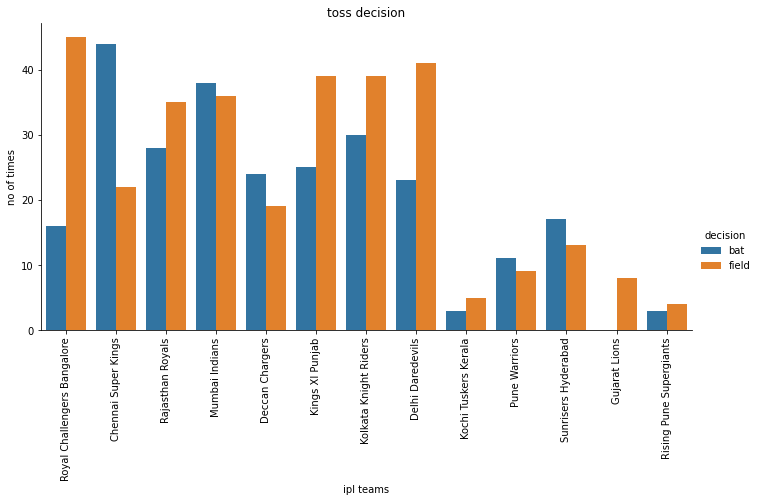

In [17]:
sns.catplot(x="toss winner",y="times",hue="decision",data=decision_making,kind="bar",height=5,aspect=2)
plt.xticks(rotation=90)
plt.title("toss decision")
plt.xlabel("ipl teams")
plt.ylabel("no of times")
plt.show()

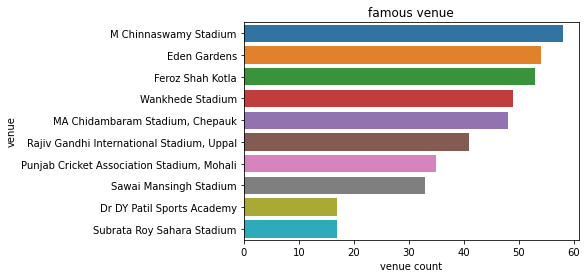

In [20]:
sns.barplot(x=data['venue'].value_counts().head(10).values,
            y=data['venue'].value_counts().head(10).index,
            data=data)
plt.title("famous venue")
plt.xlabel("venue count")
plt.ylabel("venue")
plt.show()

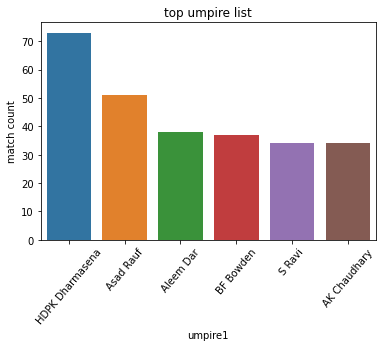

In [29]:
sns.barplot(x=data['umpire1'].value_counts().head(6).index,
            y=data['umpire1'].value_counts().head(6).values,
            data=data)
plt.xticks(rotation=50)
plt.xlabel("umpire1")
plt.ylabel("match count")
plt.title("top umpire list")
plt.show()
            

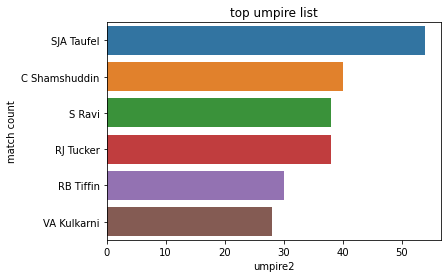

In [31]:
sns.barplot(x=data['umpire2'].value_counts().head(6).values,
            y=data['umpire2'].value_counts().head(6).index,
            data=data)
plt.xlabel("umpire2")
plt.ylabel("match count")
plt.title("top umpire list")
plt.show()

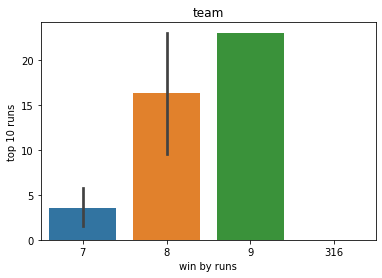

In [33]:
sns.barplot(x=data['win_by_runs'].value_counts().head(10).values,
            y=data['win_by_runs'].value_counts().head(10).index,
            data=data)
plt.title("team")
plt.xlabel("win by runs")
plt.ylabel("top 10 runs")
plt.show()